In [1]:
#make sure to convert working notebook first
import arraymaker
from ipywidgets import interactive, interact_manual,IntProgress
from IPython.display import clear_output
import time
import matplotlib.pyplot as plt
from progress.bar import Bar
from PIL import Image
import numpy as np



In [7]:
#input params
gridx = 100
gridy = gridx
facies  = 5
runs = 20
iterations = 10 #iterations is x axis param




def plots(gridx,facies,runs,iterations):
    gridy = gridx
    #creates grid of dimension x,y, number of facies
    data = arraymaker.grid(gridx, gridy,facies)
    data.genrandomgrid()
    plt.show(data.show2dgrid())

    #returns randomly extracted data
    #randomreturn(n, iterations, valuemode) Tru returns just value, false also returns x,y
    data.randomreturn(iterations, runs, True)

    #plots data on graph
    #plot()
    data.plot('sphagetti')
    data.plot('minmax')

interactive_plot = interactive(plots, gridx =(50,100,10), gridy =(50,100,10),facies  =(2,9,1), runs =(1,1001,5), iterations =(50,1000,50))
interactive_plot





interactive(children=(IntSlider(value=70, description='gridx', min=50, step=10), IntSlider(value=5, descriptio…

IntProgress(value=0, description='generating', max=1)

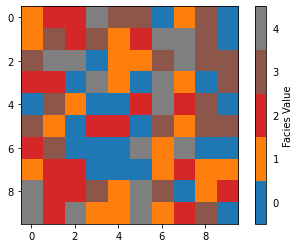

In [3]:
def generaterandomgrids(number, x, y , facies):

    f = IntProgress(
        min=0, 
        max=number,
        description='generating'
        ) 

    display(f) # display the bar

    files = []


    for i in range(1,number+1):
        data = arraymaker.grid(x,y,facies)
        data.genrandomgrid()
        files.append(data.array)
        data.show2dgrid()
        f.value += 1
        clear_output(wait=True)

        

generaterandomgrids(1, 10, 10, 5)





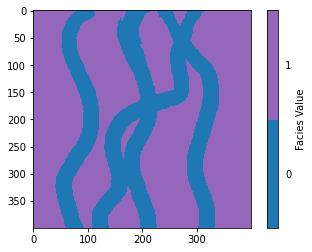

Input parameters:
Iterations: 1000
Number of sample runs: 100
Mean value: 0.68445


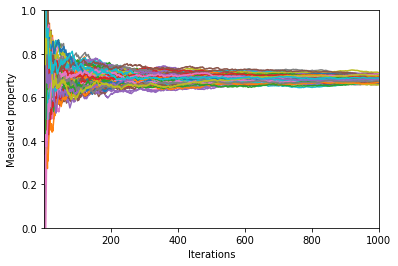

In [6]:
#open bitmap and import to np array, image created in paint
im = Image.open("Input_images/river.bmp")
inputdata = [[im.getpixel((x, y)) for x in range(im.width)] for y in range(im.height)]
inputdata = np.asarray(inputdata)
inputdata[inputdata == 255] = 1 # converts bmp black 255 to facies 1

data = arraymaker.grid(im.width,im.height,2)
data.input(inputdata,2)
data.show2dgrid()
data.randomreturn(1000, 100, True)

#plots data on graph
#plot()
data.plot('sphagetti')
